# การทดลองแบบจำลองการแยกประเภทข้อมูลบัตรสวัสดิการแห่งรัฐ
คลาสสำหรับบันทึกและโหลดแบบจำลอง

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import json
import numpy as np 
from sklearn.linear_model import LogisticRegression

class MoFWelfareModel(LogisticRegression):
    def __init__(self, C=1.0, solver='liblinear', max_iter=100, X_train=None, Y_train=None):
        LogisticRegression.__init__(self, C=C, solver=solver, max_iter=max_iter)
        self.X_train = X_train
        self.Y_train = Y_train

    def save(self, filepath):
        dict_ = {}
        dict_['C'] = self.C
        dict_['max_iter'] = self.max_iter
        dict_['solver'] = self.solver
        dict_['classes'] = self.classes_.tolist()
        dict_['coef'] = self.coef_.tolist()
        
        # Creat json and save to file
        json_txt = json.dumps(dict_, indent=6)
        with open(filepath, 'w') as file:
            file.write(json_txt)

    def load(self, filepath):
        with open(filepath, 'r') as file:
            dict_ = json.load(file)
            
        self.C = dict_['C']
        self.max_iter = dict_['max_iter']
        self.solver = dict_['solver']
        self.classes_ = np.array(dict_['classes'])
        self.coef_ = np.array(dict_['coef'])

โหลดแบบจำลองที่เทรนไว้แล้ว

In [4]:
modelFile_LR = 'model_welfare_LR.json'
model_LR = MoFWelfareModel()
model_LR.load(modelFile_LR)

 ## การสำรวจข้อมูล

In [24]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn import metrics

data = pd.read_csv('data/data_welfare.csv')
data = data.dropna()
data.head()

,Sex,Age,Occupation,Education,Elderly,Disabled,Chronic_Patient,Self_Reliance,Province_ID,Amphur_ID,...,Accommodation_Doc_Type,Occupation_Own,Occupation_Rent,Occupation_Public,Occupation_Other,Occupation_Other_Name,Occupation_Doc_Type,Happiness,Owner_Income,Label
0,ญ,43,เกษตร-ทำนา,"ประถมฯ (ป.4, ป.7, ป.6)",0,0,0,0,34,3407,...,"โฉนดที่ดิน (น.ส.4, น.ส.4 ก, น.ส.4 ข, น.ส.4 ค, ...",10,0,0,0,0,"โฉนดที่ดิน (น.ส.4, น.ส.4 ก, น.ส.4 ข, น.ส.4 ค, ...",10,100000.0,1
1,ญ,54,ธุรกิจส่วนตัว,อนุปริญญา หรือเทียบเท่า หรือ ปวส.,0,0,0,0,34,3401,...,"หนังสือรับรองการทำประโยชน์ (น.ส.3, น.ส.3 ก หรื...",0,0,0,0,0,0,10,100000.0,1
2,ช,22,รับจ้างทั่วไป,ม.ปลาย (มศ.4-5 หรือ ม.4-6 หรือ ปวช.),0,0,0,0,57,5701,...,"โฉนดที่ดิน (น.ส.4, น.ส.4 ก, น.ส.4 ข, น.ส.4 ค, ...",0,0,0,0,0,0,9,100000.0,1
3,ญ,49,รับจ้างทั่วไป,ม.ปลาย (มศ.4-5 หรือ ม.4-6 หรือ ปวช.),0,0,0,0,71,7105,...,0,0,0,0,0,0,0,7,100000.0,1
4,ช,45,เกษตร-ทำนา,"ประถมฯ (ป.4, ป.7, ป.6)",0,0,0,0,40,4019,...,แบบยื่นภาษีบำรุงท้องที่ (ภ.บ.ท.5),29,0,0,0,0,"หนังสือรับรองการทำประโยชน์ (น.ส.3, น.ส.3 ก หรื...",7,100000.0,1


ตัวอย่างการเลือกเฉพาะคอลัมน์ที่มีนัยสำคัญ

In [25]:
col_names = ['Age', 'Owner_Income']
X = data[col_names]
X.head()

,Age,Owner_Income
0,43,100000.0
1,54,100000.0
2,22,100000.0
3,49,100000.0
4,45,100000.0


In [26]:
y = data['Label']
y.value_counts()

0    2500
1    2499
Name: Label, dtype: int64

รันแบบจำลองบนข้อมูล

In [27]:
train_data, test_data, train_label, test_label = train_test_split(
    X, 
    y,
    test_size=0.25, 
    random_state = 1972)

model_LR.fit(train_data, train_label)

MoFWelfareModel(C=1.0, X_train=None, Y_train=None, max_iter=100,
                solver='liblinear')

ผลลัพธ์ที่ได้คือ มีความถูกต้องมากกว่า 89%

In [28]:
score_LR = model_LR.score(test_data, test_label)
print(score_LR)

0.8984


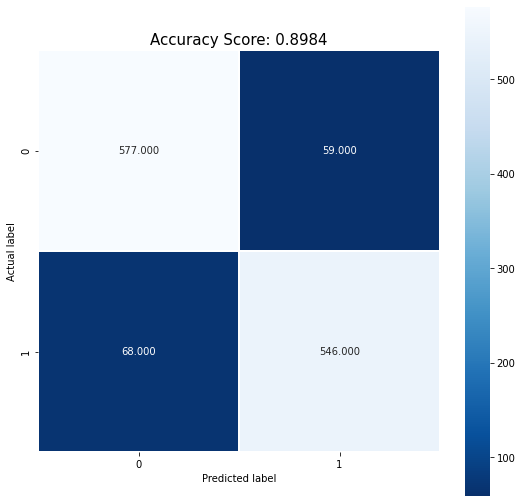

In [29]:
y_pred_LR = model_LR.predict(test_data)
cm_LR = metrics.confusion_matrix(test_label, y_pred_LR)
plt.figure(figsize=(9,9))
sns.heatmap(cm_LR, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score_LR)
plt.title(all_sample_title, size = 15);